# Assignment 5

CS4172 Machine Learning Lab

Name: Abhiroop Mukherjee

Enrolment Number: 510519109

## Task 1

Download and install TensorFlow from
https://www.tensorflow.org/install/install_sources or using command
`sudo pip install tensorflow` alternatively the Keras library can be used.

Download MNIST dataset (contains class labels for digits 0-9). using 
the command:

```python
import tensorflow as tf
data = tf.contrib.learn.datasets.mnist.load_mnist()
```
or 
```python
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
```

In [1]:
import tensorflow as tf
mnist_data = tf.keras.datasets.mnist.load_data()


In [2]:
mnist_data


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

mnist_data is a Tuple of NumPy arrays: (x_train, y_train), (x_test, y_test).

x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.

y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.

x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.

y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

In [3]:
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist_data

# mapping 0-255 to 0-1
x_train = np.array([img/255 for img in x_train])
x_test = np.array([img/255 for img in x_test])

assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)


## Task 3

Reduce the training size by 1/10 if computation resources are limited.

Define radial basis function (RBF) as

```python
def RBF(x, c, s):
    return np.exp(-np.sum((x-c)**2, axis=1)/(2*s**2))
```
where, x is the actual value, c is centre (assumed as mean) and s is the standard deviation.

Converted 28\*28 image into 32\*32 using rbf and store the new dataset with the labels. Split the dataset as 80% training and 10% validation
and 10% test.

In [4]:
import numpy as np


def RBF(x, c, s):
    return np.exp(-np.sum((x-c)**2, axis=1)/(2*s**2))

# TODO: used simple scaling to upscale the image,
# use rbf to do this in future


In [5]:
# from tensorflow.image import resize

# reshape to convert 28x28 image (assumed greyscale)
# to 28x28x1 (1 denoting only one value per pixel
# [rgb will have three numbers for eg])

# x_train = np.reshape(x_train, (-1, 28, 28, 1))
# x_train = np.array([resize(img, [32, 32]) for img in x_train])
# print(f"x_train shape: {x_train.shape}")

# x_test = np.reshape(x_test, (-1, 28, 28, 1))
# x_test = np.array([resize(img, [32, 32]) for img in x_test])
# print(f"x_test shape: {x_test.shape}")


In [6]:
import pandas as pd
# convert y to categorical
y_train = pd.get_dummies(y_train).to_numpy()
y_test = pd.get_dummies(y_test).to_numpy()


In [7]:
y_train[0:9]

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [8]:
input_shape = x_train[0].shape
num_classes = len(y_train[0])


## Task 4

Now run the fully connected network after flattening the data by changing the number the hyper-parameters use adam optimizer(learning rate = 0.001) and categorical cross-entropy loss

| Hidden Layers  | Activation Function  | Hidden Neurons    |
|----------------|----------------------|-------------------|
| 1              | Sigmoid              | \[16\]            |
| 2              | Sigmoid              | \[16,32\]         |
| 3              | Sigmoid              | \[16,32,64\]      |

In [9]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


def train_model(
        activation_function: 'str',
        hidden_neurons: 'list[int]',
        adam_learn_rate=0.001,
        dropout_rate: 'float | None' = None,
        verbose=True):

    model = Sequential()
    model.add(Input(shape=(input_shape)))
    model.add(Flatten())

    for unit in hidden_neurons[::-1]:
        model.add(Dense(unit, activation=activation_function))
        if dropout_rate is not None:
            model.add(Dropout(rate=dropout_rate))

    # softmax as it gives probabilistic value 
    # (sum of all the last nodes will be 1)
    model.add(Dense(num_classes, activation='softmax'))

    if verbose:
        model.summary()

    model.compile(optimizer=Adam(learning_rate=adam_learn_rate),
                  loss=CategoricalCrossentropy(),
                  metrics=['accuracy'])

    history = model.fit(x=x_train,
                        y=y_train,
                        validation_split=0.1,
                        epochs=100,
                        callbacks=[
                            EarlyStopping(
                                monitor='val_loss',
                                patience=5
                            )
                        ],
                        verbose='auto' if verbose else 0
                        )

    return model, history


def plot_history(
        history: "tf.keras.callbacks.History",
        activation_function: 'str',
        hidden_neurons: 'list[int]',
        dropout_rate: 'float | None' = None):

    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.xticks(
        ticks=range(0, len(history.history['loss'])),
        labels=range(1, len(history.history['loss']) + 1, 1))
    plt.ylabel('Training Loss')
    plt.xlabel('Epoch')
    plt.legend()

    if dropout_rate is None:
        plt.title(
            f'Loss vs epoch for {activation_function} {hidden_neurons}')
    else:
        plt.title(
            f'Loss vs epoch for {activation_function} {hidden_neurons} dropout {dropout_rate}')

    plt.show()

    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.xticks(
        ticks=range(0, len(history.history['loss'])),
        labels=range(1, len(history.history['loss']) + 1, 1))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')

    if dropout_rate is None:
        plt.title(
            f'Accuracy vs epoch for {activation_function} {hidden_neurons}')
    else:
        plt.title(
            f'Accuracy vs epoch for {activation_function} {hidden_neurons} dropout {dropout_rate}')

    plt.legend()
    plt.show()


In [10]:
result = pd.DataFrame(
    columns=[
        'Hidden Layers',
        'Activation Function',
        'Hidden Neurons',
        'Test Loss',
        'Test Acccuracy'],
)


In [11]:
hidden_neurons = [16]
activation_function = 'sigmoid'

model, history = train_model(activation_function, hidden_neurons)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    test_loss,
    test_acc]

plot_history(history, activation_function, hidden_neurons)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


2022-10-11 19:30:59.562851: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-11 19:30:59.587947: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-11 19:30:59.588279: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-11 19:30:59.588851: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

Epoch 1/100


2022-10-11 19:31:01.714259: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1688/1688 [==============================] - 10s 5ms/step - loss: 0.8473 - accuracy: 0.8281 - val_loss: 0.3802 - val_accuracy: 0.9140
Epoch 2/100
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3707 - accuracy: 0.9036 - val_loss: 0.2670 - val_accuracy: 0.9312
Epoch 3/100
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2979 - accuracy: 0.9171 - val_loss: 0.2284 - val_accuracy: 0.9373
Epoch 4/100
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2617 - accuracy: 0.9269 - val_loss: 0.2086 - val_accuracy: 0.9403
Epoch 5/100
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2391 - accuracy: 0.9337 - val_loss: 0.1979 - val_accuracy: 0.9460
Epoch 6/100
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2229 - accuracy: 0.9370 - val_loss: 0.1864 - val_accuracy: 0.9475
Epoch 7/100
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2108 - accuracy: 0.9405 - val_loss: 0.1800 - val_accuracy: 0.9

KeyboardInterrupt: 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 10)                170       
                                                                 
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1688/1688 [==============================] - 7s 4ms/step - loss: 11.2981 - accuracy: 0.0879 - val_loss: 11.1376 - val_accuracy: 0.0898
Epoch 2/100
1688/1688 [============

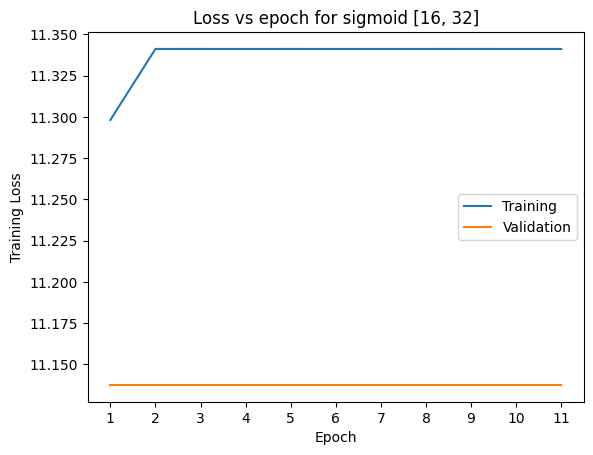

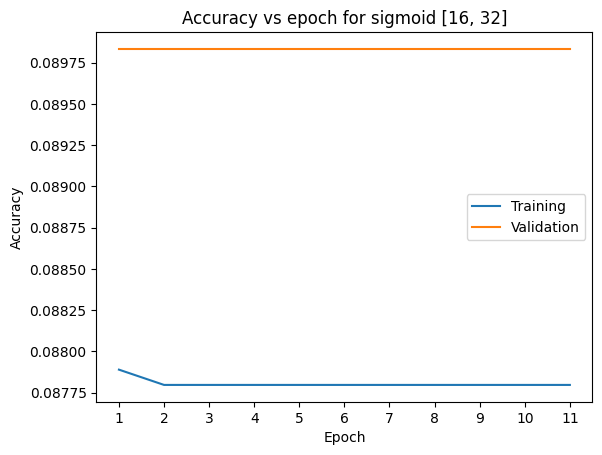

In [ ]:
activation_function = 'sigmoid'
hidden_neurons = [16, 32]

model, history = train_model(activation_function, hidden_neurons)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    test_loss,
    test_acc]

plot_history(history, activation_function, hidden_neurons)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                50240     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 10)                170       
                                                                 
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1688/1688 [===========================

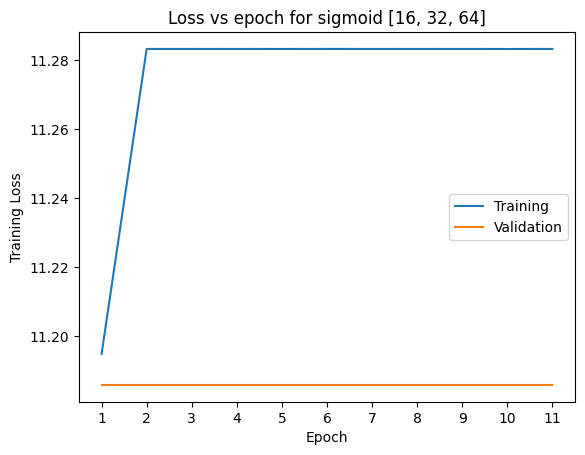

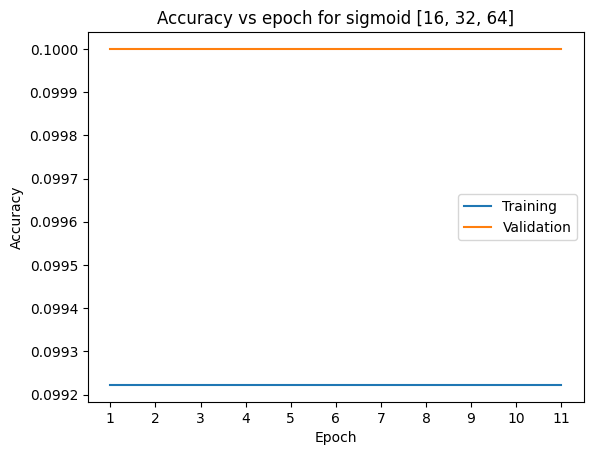

In [ ]:
hidden_neurons = [16, 32, 64]
activation_function = 'sigmoid'

model, history = train_model(activation_function, hidden_neurons)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    test_loss,
    test_acc]

plot_history(history, activation_function, hidden_neurons)


In [ ]:
result


,Hidden Layers,Activation Function,Hidden Neurons,Test Loss,Test Acccuracy
0,1,sigmoid,[16],8.599005,0.1501
1,2,sigmoid,"[16, 32]",11.374550,0.0867
2,3,sigmoid,"[16, 32, 64]",11.347146,0.1032


## Task 5

Now run the network by changing the number the Activation Function
hyper-parameters:

| Hidden Layers  | Activation Function  | Hidden Neurons    |
|----------------|----------------------|-------------------|
| 3              | Sigmoid              | \[16,32,64\]      |
| 3              | Tanh                 | \[16,32,64\]      |
| 3              | Relu                 | \[16,32,64\]      |

In [ ]:
result = pd.DataFrame(
    columns=[
        'Hidden Layers',
        'Activation Function',
        'Hidden Neurons',
        'Test Loss',
        'Test Acccuracy'],
)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dense_12 (Dense)            (None, 10)                170       
                                                                 
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1688/1688 [===========================

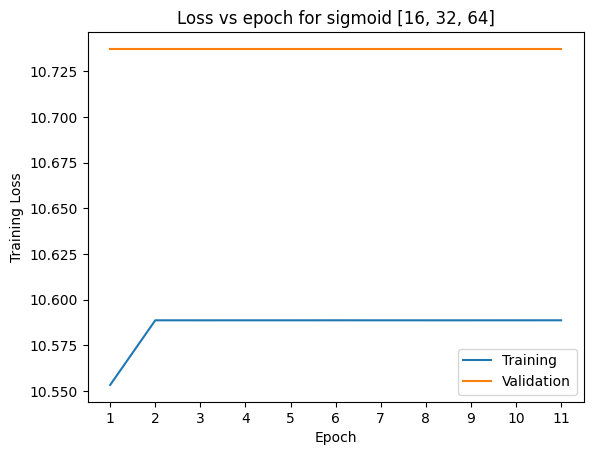

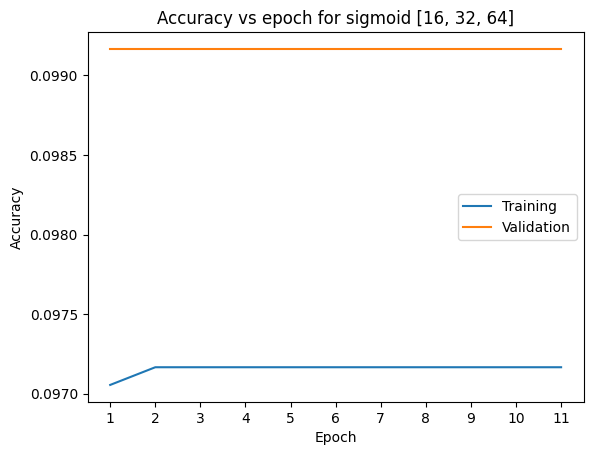

In [ ]:
hidden_neurons = [16, 32, 64]
activation_function = 'sigmoid'

model, history = train_model(activation_function, hidden_neurons)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    test_loss,
    test_acc]

plot_history(history, activation_function, hidden_neurons)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                50240     
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 16)                528       
                                                                 
 dense_16 (Dense)            (None, 10)                170       
                                                                 
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1688/1688 [===========================

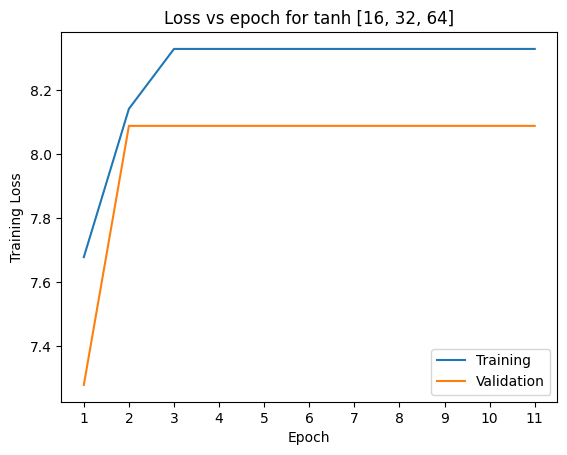

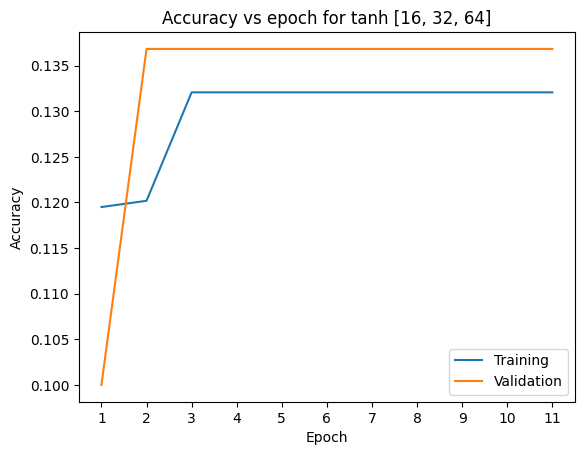

In [ ]:
hidden_neurons = [16, 32, 64]
activation_function = 'tanh'

model, history = train_model(activation_function, hidden_neurons)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    test_loss,
    test_acc]

plot_history(history, activation_function, hidden_neurons)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 64)                50240     
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 10)                170       
                                                                 
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1688/1688 [===========================

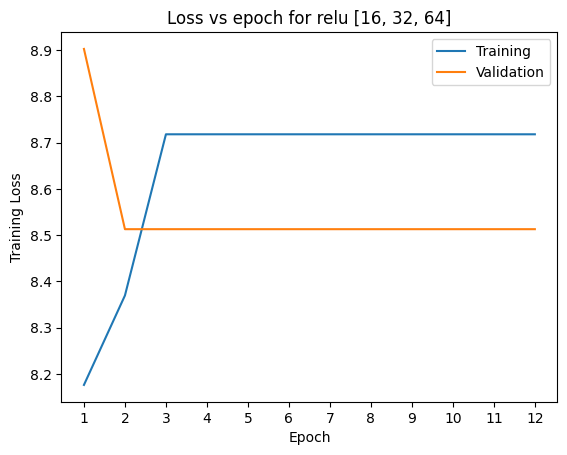

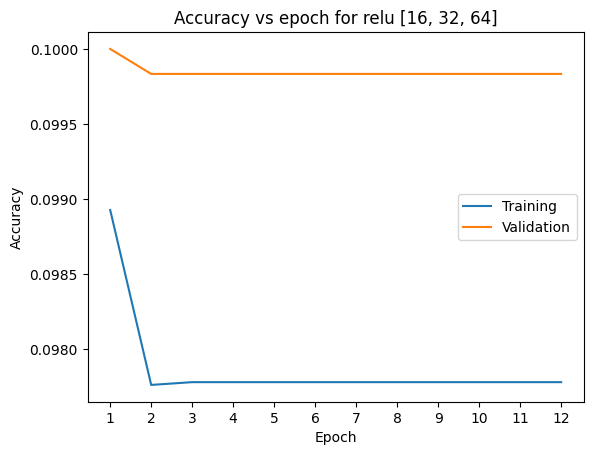

In [ ]:
hidden_neurons = [16, 32, 64]
activation_function = 'relu'

model, history = train_model(activation_function, hidden_neurons)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    test_loss,
    test_acc]

plot_history(history, activation_function, hidden_neurons)


In [ ]:
result


,Hidden Layers,Activation Function,Hidden Neurons,Test Loss,Test Acccuracy
0,3,sigmoid,"[16, 32, 64]",10.641169,0.0982
1,3,tanh,"[16, 32, 64]",8.439432,0.1355
2,3,relu,"[16, 32, 64]",8.806926,0.0980


In [ ]:
best_activation_fn = result.sort_values(
    by=['Test Acccuracy', 'Test Loss'],
    ascending=[False, True]
    )['Activation Function'].iloc[0]

best_activation_fn

'tanh'

## Task 6

Now run the network by changing the number the Dropout hyper-parameters:

| Hidden Layers  | Activation Function  | Hidden Neurons    | Dropout   |
|----------------|----------------------|-------------------|-----------|
| 3              | Relu                 | \[16,32,64\]      |0.9        |
| 3              | Relu                 | \[16,32,64\]      |0.75       |
| 3              | Relu                 | \[16,32,64\]      |0.5        |
| 3              | Relu                 | \[16,32,64\]      |0.25       |
| 3              | Relu                 | \[16,32,64\]      |0.10       |

In [ ]:
result = pd.DataFrame(
    columns=[
        'Hidden Layers',
        'Activation Function',
        'Hidden Neurons',
        'Dropout',
        'Test Loss',
        'Test Acccuracy'],
)


In [ ]:
hidden_neurons = [16, 32, 64]
activation_function = 'sigmoid'
dropout_val = 0.9

model, history = train_model(activation_function, hidden_neurons, dropout_val)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    dropout_val,
    test_loss,
    test_acc]

plot_history(history, activation_function, hidden_neurons, dropout_val)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 64)                50240     
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 16)                528       
                                                                 
 dense_24 (Dense)            (None, 10)                170       
                                                                 
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1688/1688 [===========================

KeyboardInterrupt: 

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 64)                50240     
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 16)                528       
                                                                 
 dense_28 (Dense)            (None, 10)                170       
                                                                 
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1688/1688 [===========================

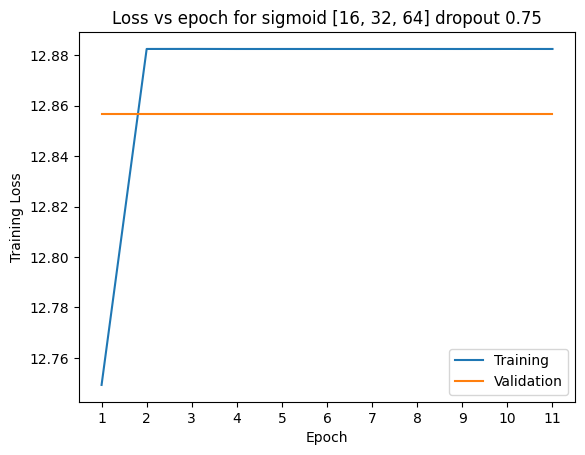

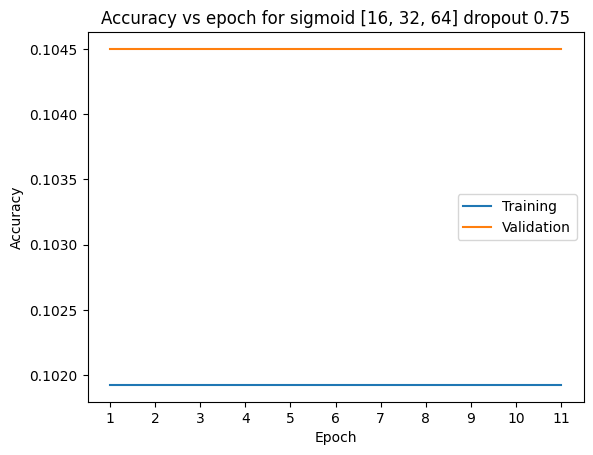

In [ ]:
hidden_neurons = [16, 32, 64]
activation_function = 'sigmoid'
dropout_val = 0.75

model, history = train_model(activation_function, hidden_neurons, dropout_val)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    dropout_val,
    test_loss,
    test_acc]

plot_history(history, activation_function, hidden_neurons, dropout_val)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 64)                50240     
                                                                 
 dense_30 (Dense)            (None, 32)                2080      
                                                                 
 dense_31 (Dense)            (None, 16)                528       
                                                                 
 dense_32 (Dense)            (None, 10)                170       
                                                                 
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1688/1688 [===========================

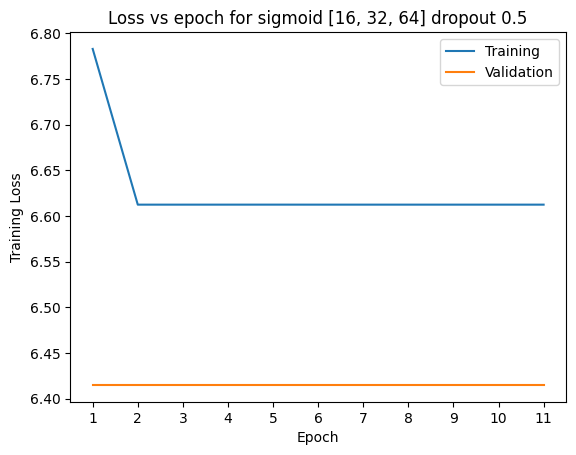

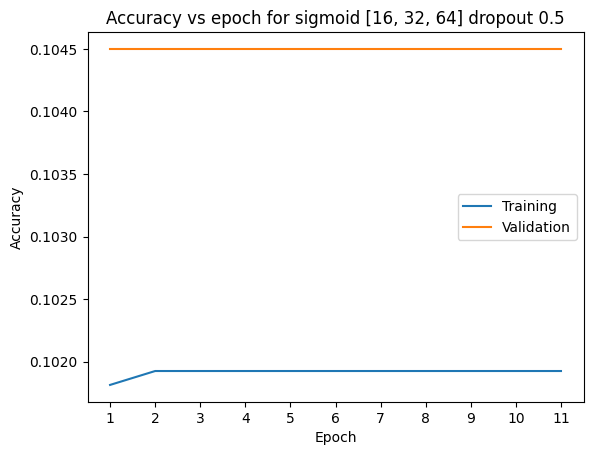

In [ ]:
hidden_neurons = [16, 32, 64]
activation_function = 'sigmoid'
dropout_val = 0.5

model, history = train_model(activation_function, hidden_neurons, dropout_val)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    dropout_val,
    test_loss,
    test_acc]

plot_history(history, activation_function, hidden_neurons, dropout_val)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 64)                50240     
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dense_35 (Dense)            (None, 16)                528       
                                                                 
 dense_36 (Dense)            (None, 10)                170       
                                                                 
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1688/1688 [===========================

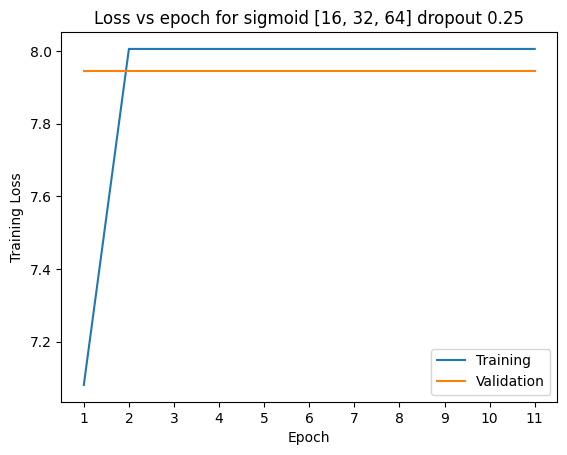

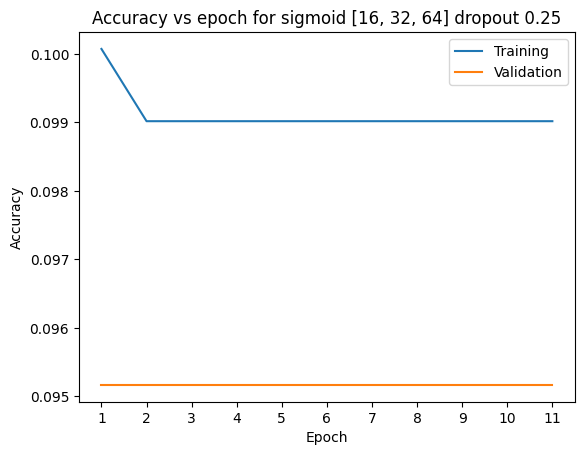

In [ ]:
hidden_neurons = [16, 32, 64]
activation_function = 'sigmoid'
dropout_val = 0.25

model, history = train_model(activation_function, hidden_neurons, dropout_val)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    dropout_val,
    test_loss,
    test_acc]

plot_history(history, activation_function, hidden_neurons, dropout_val)


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_37 (Dense)            (None, 64)                50240     
                                                                 
 dense_38 (Dense)            (None, 32)                2080      
                                                                 
 dense_39 (Dense)            (None, 16)                528       
                                                                 
 dense_40 (Dense)            (None, 10)                170       
                                                                 
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1688/1688 [==========================

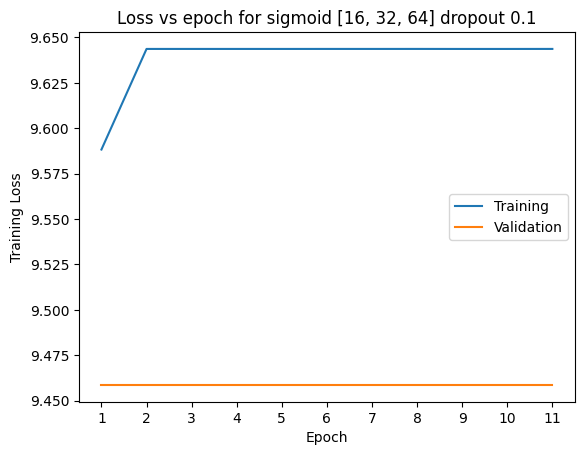

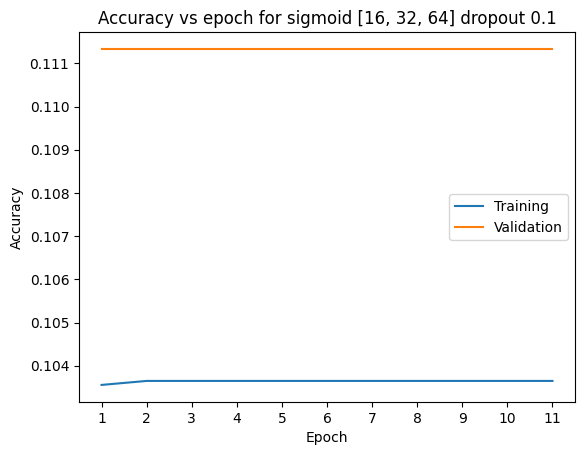

In [ ]:
hidden_neurons = [16, 32, 64]
activation_function = 'sigmoid'
dropout_val = 0.1

model, history = train_model(activation_function, hidden_neurons, dropout_val)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    dropout_val,
    test_loss,
    test_acc]

plot_history(history, activation_function, hidden_neurons, dropout_val)


In [ ]:
result


,Hidden Layers,Activation Function,Hidden Neurons,Dropout,Test Loss,Test Acccuracy
0,3,sigmoid,"[64, 32, 16]",0.90,6.493979,0.0974
1,3,sigmoid,"[64, 32, 16]",0.75,11.174682,0.0974
2,3,sigmoid,"[64, 32, 16]",0.50,4.787076,0.1009
3,3,sigmoid,"[64, 32, 16]",0.25,2.302496,0.0980
4,3,sigmoid,"[64, 32, 16]",0.10,11.082807,0.1028


In [ ]:
best_dropout = result.sort_values(
    by=['Test Acccuracy', 'Test Loss'],
    ascending=[False, True]
    )['Dropout'].iloc[0]

best_dropout

0.1

## Task 8

With  the  best    set    hyperparameter  from  above  run  vary  the 
Adam  Optimizer  learning  rate  [0.01,  0.001,  0.005,  0.0001,  0.0005]. Print  the  time  to  achieve  the  best  validation  accuracy  (as  reported before from all run)  for all these five run .

In [ ]:
print(f"best activation function: {best_activation_fn}")
print(f"best dropout value: {best_dropout}")

best activation function: sigmoid
best dropout value: 0.1


In [ ]:
import time

result = pd.DataFrame(
    columns=[
        'Hidden Layers',
        'Activation Function',
        'Hidden Neurons',
        'Dropout',
        'Adam Learn Rate'
        'Time Taken',
        'Test Loss',
        'Test Acccuracy'],
)

In [ ]:
hidden_neurons = [16, 32, 64]
adam_learn_rates = [0.01,  0.001,  0.005,  0.0001,  0.0005]

for adam_rate in adam_learn_rates:
    before = time.time()
    model, _ = train_model(
        activation_function=best_activation_fn,
        hidden_neurons=hidden_neurons,
        adam_learn_rate=adam_rate,
        dropout_rate=best_dropout,
        verbose=False
    )
    after = time.time()
    time_taken = after-before

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

    result.loc[len(result.index)] = [
        len(hidden_neurons),
        activation_function,
        str(hidden_neurons),
        dropout_val,
        adam_rate
        time_taken,
        test_loss,
        test_acc]

result


313/313 [==============================] - 1s 3ms/step - loss: 9.5435 - accuracy: 0.0980
[3, 'sigmoid', '[16, 32, 64]', 0.1, 72.49851131439209, 9.543513298034668, 0.09799999743700027]
313/313 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0980
[3, 'sigmoid', '[16, 32, 64]', 0.1, 122.30231070518494, nan, 0.09799999743700027]
313/313 [==============================] - 1s 3ms/step - loss: 8.0736 - accuracy: 0.0982
[3, 'sigmoid', '[16, 32, 64]', 0.1, 75.00499820709229, 8.073553085327148, 0.0982000008225441]
313/313 [==============================] - 1s 3ms/step - loss: 8.1348 - accuracy: 0.1507
[3, 'sigmoid', '[16, 32, 64]', 0.1, 146.52687048912048, 8.134782791137695, 0.15070000290870667]
313/313 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0980
[3, 'sigmoid', '[16, 32, 64]', 0.1, 86.34397983551025, nan, 0.09799999743700027]


,Hidden Layers,Activation Function,Hidden Neurons,Dropout,Time Taken,Test Loss,Test Acccuracy
0,3,sigmoid,"[16, 32, 64]",0.1,72.498511,9.543513,0.0980
1,3,sigmoid,"[16, 32, 64]",0.1,122.302311,NaN,0.0980
2,3,sigmoid,"[16, 32, 64]",0.1,75.004998,8.073553,0.0982
3,3,sigmoid,"[16, 32, 64]",0.1,146.526870,8.134783,0.1507
4,3,sigmoid,"[16, 32, 64]",0.1,86.343980,NaN,0.0980
